In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# load data
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
# rename the columns
cols = []
for column in customer_df.columns:
    column=column.replace(' ', '_')
    cols.append(column.lower())
customer_df.columns = cols

In [6]:
# Change 'effective_to_date' column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [7]:
# Drop useless columns
customer_df= customer_df.drop(['customer'], axis=1)

In [8]:
data_crosstab = pd.crosstab(customer_df['policy_type'], customer_df['policy'], margins = False)
data_crosstab

policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
policy_type,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0
Personal Auto,0,0,0,1240,2122,3426,0,0,0
Special Auto,0,0,0,0,0,0,66,164,148


In [9]:
customer_df= customer_df.drop(['policy_type'], axis=1)

In [10]:
# 1. Import sklearn train_test_split
from sklearn.model_selection import train_test_split

<AxesSubplot:ylabel='customer_lifetime_value'>

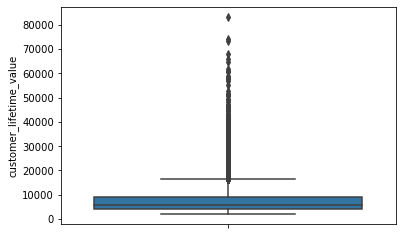

In [11]:
# 2. Removing outliers
sns.boxplot(y=customer_df['customer_lifetime_value'])

In [12]:
iqr = np.percentile(customer_df['customer_lifetime_value'],75) - np.percentile(customer_df['customer_lifetime_value'],25)
upper_limit = np.percentile(customer_df['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(customer_df['customer_lifetime_value'],25) - 1.5*iqr
customer_df = customer_df[(customer_df['customer_lifetime_value']>lower_limit) & (customer_df['customer_lifetime_value']<upper_limit)]

<AxesSubplot:ylabel='total_claim_amount'>

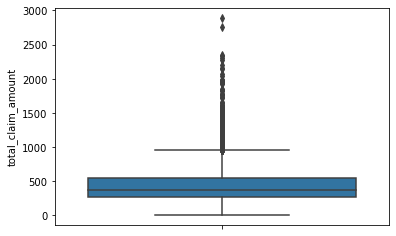

In [13]:
sns.boxplot(y=customer_df['total_claim_amount'])

In [14]:
iqr = np.percentile(customer_df['total_claim_amount'],75) - np.percentile(customer_df['total_claim_amount'],25)
upper_limit = np.percentile(customer_df['total_claim_amount'],75) + 1.5*iqr
lower_limit = np.percentile(customer_df['total_claim_amount'],25) - 1.5*iqr
customer_df = customer_df[(customer_df['total_claim_amount']>lower_limit) & (customer_df['total_claim_amount']<upper_limit)]

In [15]:
customer_df=customer_df.reset_index(drop=True)

In [16]:
# 3. Create a copy of the dataframe for the data wrangling
data=customer_df.copy()

In [17]:
# There a lot of customers with 0 income (33.5%). May be it corresponds to customer with no data, rather than no income.
# I'm going to use all other columns to predict income

In [18]:
numericals = data.select_dtypes(np.number)
numericals_with_income = numericals[numericals['income']>0]
numericals_with_income.shape

(6070, 8)

In [19]:
X_income = numericals_with_income.drop(['income'],axis=1)
y_income = numericals_with_income['income']

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [21]:
X_normalized_income = pd.DataFrame(MinMaxScaler().fit_transform(X_income), columns=X_income.columns)
X_normalized_income

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.045047,0.035714,0.914286,0.050505,0.0,0.000,0.404832
1,0.753619,0.209821,0.514286,0.383838,0.0,0.125,0.595994
2,0.048559,0.053571,0.342857,0.444444,0.0,0.000,0.145251
3,0.429486,0.035714,0.400000,0.949495,0.0,0.125,0.167614
4,0.228237,0.026786,0.000000,0.131313,0.0,1.000,0.338315
...,...,...,...,...,...,...,...
6065,0.989776,0.325893,0.885714,0.424242,0.0,0.125,0.676734
6066,0.203830,0.013393,0.171429,0.484848,0.0,0.250,0.323162
6067,0.138615,0.191964,0.457143,0.585859,0.0,0.000,0.569486
6068,0.068353,0.080357,0.400000,0.282828,0.0,0.000,0.398927


In [22]:
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_normalized_income,y_income)
KNN.score(X_normalized_income,y_income)

0.5840197693574959

In [23]:
X_all = numericals.drop(['income'],axis=1)
X_normalized_all = pd.DataFrame(MinMaxScaler().fit_transform(X_all), columns=X_all.columns)
y_all = numericals['income']

In [24]:
predicted_income = pd.Series(KNN.predict(X_normalized_all),name='predicted_income')

<AxesSubplot:>

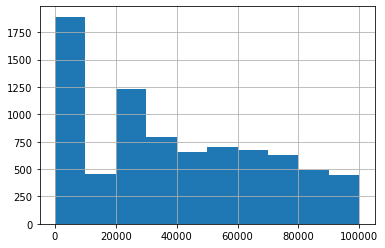

In [25]:
data['income'].hist()

In [26]:
data['predicted_income']=pd.Series(KNN.predict(X_normalized_all),name='predicted_income')

In [27]:
data.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,predicted_income
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,14906
1,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,48767
2,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,32150
3,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,43836
4,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,...,94,0,2,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,62902


In [28]:
data['income'] = np.where(data['income']==0 , data['predicted_income'], data['income'])

<AxesSubplot:>

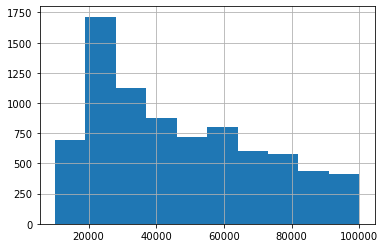

In [29]:
data['income'].hist()

In [30]:
data=data.drop(['predicted_income'], axis=1)
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,32,5,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,18,38,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
2,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,32150,Suburban,...,18,65,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
3,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,12,44,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
4,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,...,14,94,0,2,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7957,California,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761,Suburban,...,16,58,0,1,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
7958,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,14,28,0,1,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
7959,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,10738,Suburban,...,9,37,3,2,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
7960,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,34,3,0,3,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [31]:
data.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      float64
vehicle_class                           

In [32]:
data['effective_to_date_weekday']=list(map(lambda x: x.isoweekday(), data['effective_to_date']))
data['effective_to_date_month']=list(map(lambda x: x.month, data['effective_to_date']))

In [33]:
data=data.drop(['effective_to_date'], axis=1) 

In [34]:
# 4. Normalize the continuous variables
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'],axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object) 

In [35]:
X_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date_weekday,effective_to_date_month
0,2763.519279,56274,69,32,5,0,1,4,2
1,12887.431650,48767,108,18,38,0,2,6,2
2,7645.861827,32150,106,18,65,0,7,4,1
3,2813.692575,43836,73,12,44,0,1,4,2
4,8256.297800,62902,69,14,94,0,2,2,1
...,...,...,...,...,...,...,...,...,...
7957,4100.398533,47761,104,16,58,0,1,4,1
7958,3096.511217,21604,79,14,28,0,1,6,2
7959,8163.890428,10738,85,9,37,3,2,7,2
7960,7524.442436,21941,96,34,3,0,3,4,2


In [36]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns)

In [37]:
# 5. Encode the categorical variables
X_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
2,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
3,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize
4,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal L3,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7957,California,No,Premium,College,Employed,F,Suburban,Single,Personal L2,Offer1,Branch,Four-Door Car,Large
7958,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
7959,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
7960,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large


In [38]:
X_cat['coverage'] = X_cat['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
X_cat['employmentstatus'] = X_cat['employmentstatus'].map({'Employed' : 0, 'Unemployed' : 1, 'Medical Leave' : 2, 'Disabled': 3, 'Retired': 4})
X_cat['location_code'] = X_cat['location_code'].map({'Suburban' : 0, 'Rural' : 1, 'Urban' : 2})
X_cat['vehicle_size'] = X_cat['vehicle_size'].map({'Medsize' : 0, 'Small' : 1, 'Large' : 2})

C:\Users\Usuario\AppData\Local\Temp/ipykernel_10580/3042371383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat['coverage'] = X_cat['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
C:\Users\Usuario\AppData\Local\Temp/ipykernel_10580/3042371383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat['employmentstatus'] = X_cat['employmentstatus'].map({'Employed' : 0, 'Unemployed' : 1, 'Medical Leave' : 2, 'Disabled': 3, 'Retired': 4})
C:\Users\Usuario\AppData\Local\Temp/ipykernel_1058

In [39]:
X_cat_ordinal=X_cat[['coverage', 'employmentstatus', 'location_code', 'vehicle_size']]

In [40]:
X_cat_onehot=X_cat.drop(['coverage', 'employmentstatus', 'location_code', 'vehicle_size'], axis=1)
X_cat_onehot

,state,response,education,gender,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,No,Bachelor,F,Married,Corporate L3,Offer1,Agent,Two-Door Car
1,Nevada,No,Bachelor,F,Married,Personal L3,Offer1,Agent,Two-Door Car
2,California,No,Bachelor,M,Married,Corporate L2,Offer1,Call Center,SUV
3,Washington,No,Bachelor,M,Single,Personal L1,Offer1,Agent,Four-Door Car
4,Oregon,Yes,Bachelor,F,Married,Personal L3,Offer2,Web,Two-Door Car
...,...,...,...,...,...,...,...,...,...
7957,California,No,College,F,Single,Personal L2,Offer1,Branch,Four-Door Car
7958,California,Yes,College,F,Divorced,Corporate L3,Offer1,Branch,Four-Door Car
7959,California,No,Bachelor,M,Single,Corporate L2,Offer1,Branch,Four-Door Car
7960,California,No,College,M,Married,Personal L2,Offer3,Branch,Four-Door Car


In [41]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat_onehot)

In [42]:
cols=[]
for row in encoder.categories_:
    for col_name in row[1::]:
        cols.append(col_name)
cols=encoder.get_feature_names(input_features=X_cat_onehot.columns)
X_cat_encode=pd.DataFrame(encoder.transform(X_cat_onehot).toarray(),columns=cols)
X_cat_encode.head()

C:\Users\Usuario\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_Doctor,education_High School or Below,education_Master,gender_M,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [43]:
# 6. The time variable can be useful. Try to transform its data into a useful one
# Already done in #3

In [44]:
# 7. Check and make sure that every column is numerical
X=pd.concat([x_normalized, X_cat_ordinal, X_cat_encode], axis=1)

In [45]:
X.dtypes

customer_lifetime_value           float64
income                            float64
monthly_premium_auto              float64
months_since_last_claim           float64
months_since_policy_inception     float64
number_of_open_complaints         float64
number_of_policies                float64
effective_to_date_weekday         float64
effective_to_date_month           float64
coverage                            int64
employmentstatus                    int64
location_code                       int64
vehicle_size                        int64
state_California                  float64
state_Nevada                      float64
state_Oregon                      float64
state_Washington                  float64
response_Yes                      float64
education_College                 float64
education_Doctor                  float64
education_High School or Below    float64
education_Master                  float64
gender_M                          float64
marital_status_Married            

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# 8. Try a simple linear regression with all the data to see whether we are getting good results
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.5021313822698226

In [48]:
# 9. Define a function that takes a list of models and train (and tests) them
def tester (model, X, y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    if model=='LinearRegressor':
        from sklearn.linear_model import LinearRegression
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import r2_score
        lm = LinearRegression()
        lm.fit(X_train,y_train)
        from sklearn.metrics import r2_score
        predictions = lm.predict(X_train)
        r2=r2_score(y_train, predictions)
        print(r2)
    elif model=='KNeighborsRegressor':
        from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
        KNN = KNeighborsRegressor(n_neighbors=5)
        KNN.fit(X_train, y_train)
        score = KNN.score(X_test, y_test)
        print(score)
    elif model=='MLPRegressor':
        from sklearn.neural_network import MLPRegressor
        regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
        regr.predict(X_test[:2])
        score=regr.score(X_test, y_test)
        print(score)

In [49]:
# 10. Use the function to check LinearRegressor and KNeighborsRegressor
tester ('LinearRegressor', X, y)

0.5021313822698226


In [50]:
tester ('KNeighborsRegressor', X, y)

0.5756065658731215


In [51]:
# 11. You can check also the MLPRegressor for this task!
tester ('MLPRegressor', X, y)

0.808099298702073


C:\Users\Usuario\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# 12. Check and discuss the results
# LinearRegressor has the worst score, and KNeighborsRegressor has a better score. MLPRegressor is the best by far.